# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed.
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

In [6]:
import numpy as np

w = 2.0
b = 2.0
sigma = 2
n_samples = 1000

np.random.seed(24)
x_values = np.random.uniform(-10, 10, n_samples) # Generate normal distribution of x values
noise = np.random.normal(0, sigma, n_samples) # Noise to be adde to the function generating y values
y_values = w * x_values + b + noise

fit = np.polyfit(x_values, y_values, 1)
y_pred = np.polyval(fit, x_values)

residuals = y_values - y_pred # for histogram

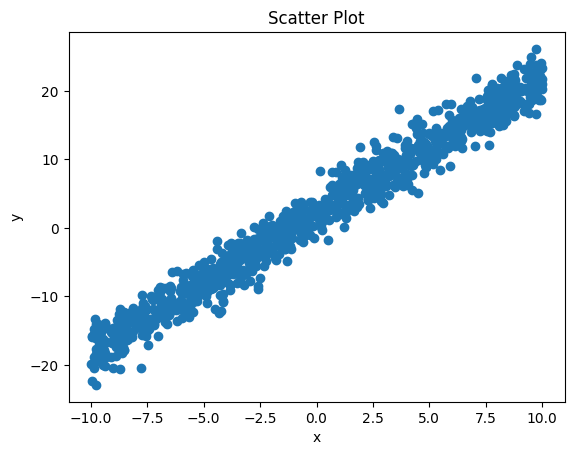

In [7]:
import matplotlib.pyplot as plt

# Scatter Plot: x vs y
plt.scatter(x_values, y_values)
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

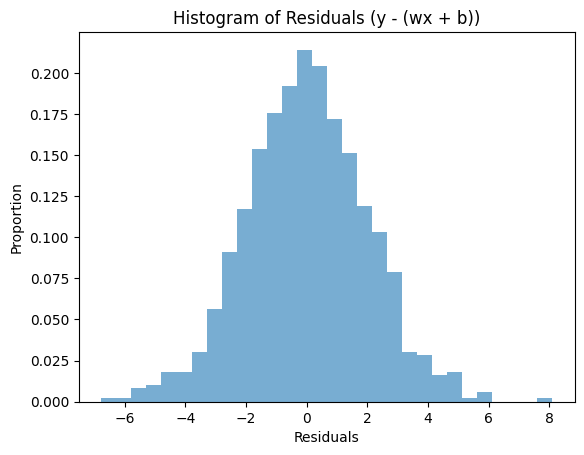

In [8]:
# Plot histogram of residuals y - (wx + b)

plt.hist(residuals, bins=30, density=True, alpha=0.6)
plt.title('Histogram of Residuals (y - (wx + b))')
plt.xlabel('Residuals')
plt.ylabel('Proportion')
plt.show()

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [9]:
def model_loop(x, w, b): # loop function
    y = []
    for xi in x:
        yi = w * xi + b
        y.append(yi)
    return np.array(y)

def model_np(x, w, b): # NumPy function
    return w * x + b

np.random.seed(68)
x = np.random.uniform(-10, 10, 1000) # Generate sample input

w = 2.0
b = 2.0
y_loop = model_loop(x, w, b)
y_np = model_np(x, w, b)

# Check if outputs are identical
identical = np.allclose(y_loop, y_np)

print(f"Outputs are identical: {identical}")

Outputs are identical: True


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

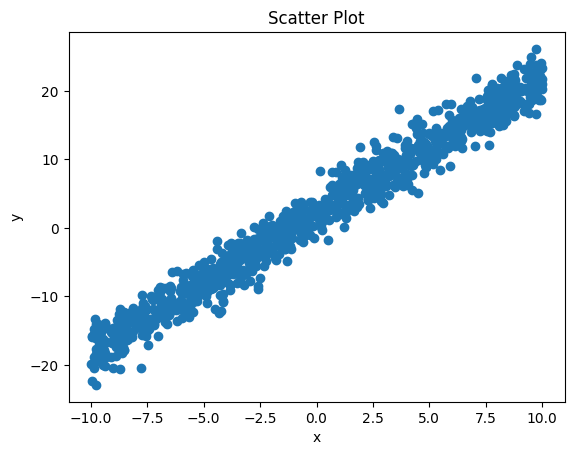

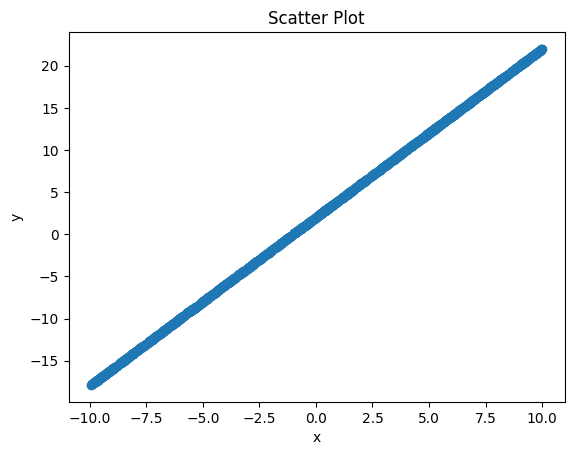

In [10]:
plt.scatter(x_values, y_values)
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(x, model_np(x, w, b))
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant.
   * Plot the cost vs $b$ for the dataset, holding $w$ constant.


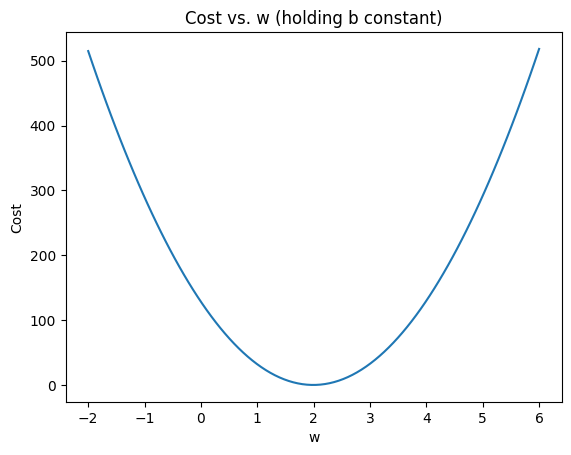

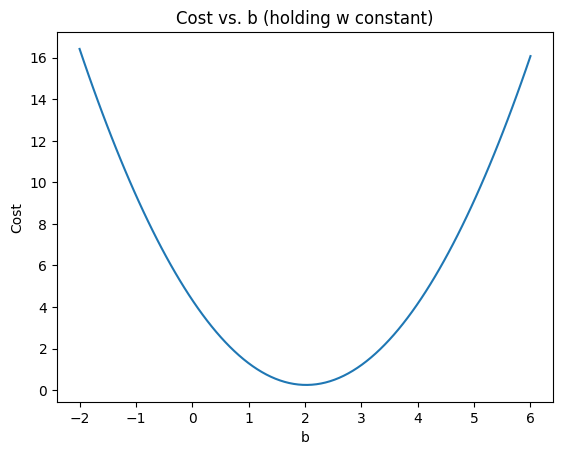

In [11]:
np.random.seed(55)
x = np.random.uniform(-10, 10, 1000)
w_true = 2.0
b_true = 2.0
sigma = 0.5
noise = np.random.normal(0, sigma, 1000)
y = w_true * x + b_true + noise

def cost(x, y, w, b): # compute mean squared error
    y_pred = model_np(x, w, b)
    return np.mean((y - y_pred) ** 2)

# Plot 1: Cost vs. w (holding b constant)
w_values = np.linspace(-2, 6, 100)
costs_w = [cost(x, y, w, b_true) for w in w_values]

plt.plot(w_values, costs_w)
plt.title('Cost vs. w (holding b constant)')
plt.xlabel('w')
plt.ylabel('Cost')
plt.show()

# Plot 2: Cost vs. b (holding w constant)
b_values = np.linspace(-2, 6, 100)
costs_b = [cost(x, y, w_true, b) for b in b_values]

plt.plot(b_values, costs_b)
plt.title('Cost vs. b (holding w constant)')
plt.xlabel('b')
plt.ylabel('Cost')
plt.show()


5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant.
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant.

In [12]:
# linear model
def model_np(x, w, b):
    return w * x + b

# cost function (mean squared error)
def cost(x, y, w, b):
    y_pred = model_np(x, w, b)
    return np.mean((y - y_pred) ** 2)

# gradient calculation (partial derivatives wrt w and b)
def gradient(x, y, w, b):
    y_pred = model_np(x, w, b)
    error = y_pred - y
    dj_dw = (2 / len(x)) * np.dot(error, x)
    dj_db = (2 / len(x)) * np.sum(error)
    return dj_dw, dj_db

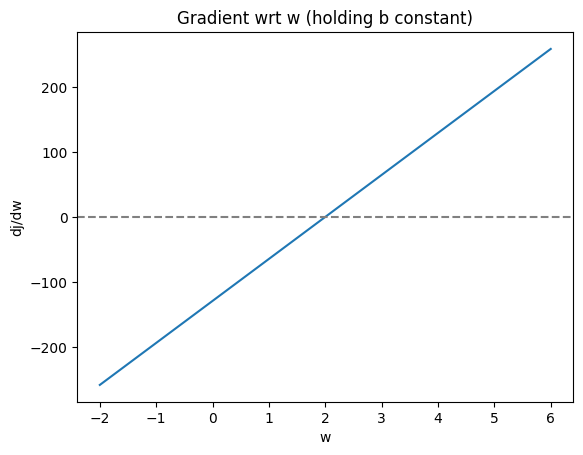

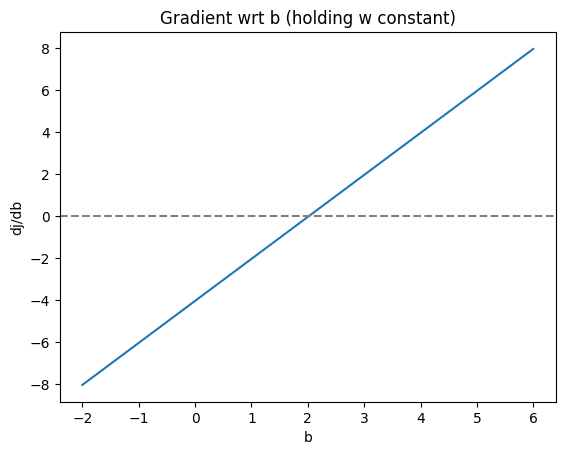

In [13]:
w_values = np.linspace(-2, 6, 100)   # w values for plotting
b_values = np.linspace(-2, 6, 100)   # b values for plotting

# Plot 1: Gradient wrt w (b is held constant)
gradients_w = [gradient(x, y, w, b_true)[0] for w in w_values]

plt.plot(w_values, gradients_w)
plt.axhline(0, color='gray', linestyle='--')  # Mark where gradient = 0
plt.title('Gradient wrt w (holding b constant)')
plt.xlabel('w')
plt.ylabel('dj/dw')
plt.show()

# Plot 2: Gradient wrt b (w is held constant)
gradients_b = [gradient(x, y, w_true, b)[1] for b in b_values]

plt.plot(b_values, gradients_b)
plt.axhline(0, color='gray', linestyle='--')  # Mark where gradient = 0
plt.title('Gradient wrt b (holding w constant)')
plt.xlabel('b')
plt.ylabel('dj/db')
plt.show()


6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`.

In [32]:
import copy
import math

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient):
    w = copy.deepcopy(w_in)

    J_history = []
    p_history = []

    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i<100000:
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

In [35]:
w_init = 0.1  # initial w
b_init = 0.1  # initial b
alpha = 0.01  # alpha (learning rate)
num_iters = 1000  # iterations

# gradient descent
final_w, b_final, J_hist, p_hist = gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost, gradient)

# final results of w and b
print(f"Final parameters: w = {final_w}, b = {b_final}")

Iteration    0: Cost 1.81e+01  dj_dw: -1.212e+02, dj_db: -2.845e+00   w:  1.312e+00, b: 1.28446e-01
Iteration  100: Cost 3.13e-01  dj_dw: -4.324e-03, dj_db: -5.146e-01   w:  1.992e+00, b: 1.76724e+00
Iteration  200: Cost 2.51e-01  dj_dw: -5.761e-04, dj_db: -6.856e-02   w:  1.994e+00, b: 1.98630e+00
Iteration  300: Cost 2.49e-01  dj_dw: -7.674e-05, dj_db: -9.133e-03   w:  1.994e+00, b: 2.01548e+00
Iteration  400: Cost 2.49e-01  dj_dw: -1.022e-05, dj_db: -1.217e-03   w:  1.994e+00, b: 2.01937e+00
Iteration  500: Cost 2.49e-01  dj_dw: -1.362e-06, dj_db: -1.621e-04   w:  1.994e+00, b: 2.01989e+00
Iteration  600: Cost 2.49e-01  dj_dw: -1.814e-07, dj_db: -2.159e-05   w:  1.994e+00, b: 2.01996e+00
Iteration  700: Cost 2.49e-01  dj_dw: -2.417e-08, dj_db: -2.877e-06   w:  1.994e+00, b: 2.01997e+00
Iteration  800: Cost 2.49e-01  dj_dw: -3.220e-09, dj_db: -3.832e-07   w:  1.994e+00, b: 2.01997e+00
Iteration  900: Cost 2.49e-01  dj_dw: -4.290e-10, dj_db: -5.105e-08   w:  1.994e+00, b: 2.01997e+00


7. Plot the cost and parameters versus iteration of gradient descent.

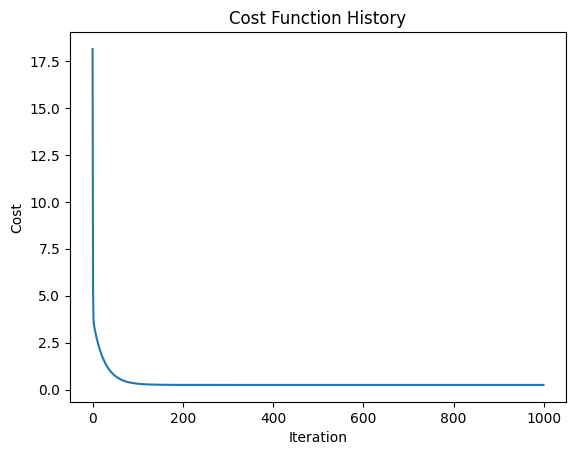

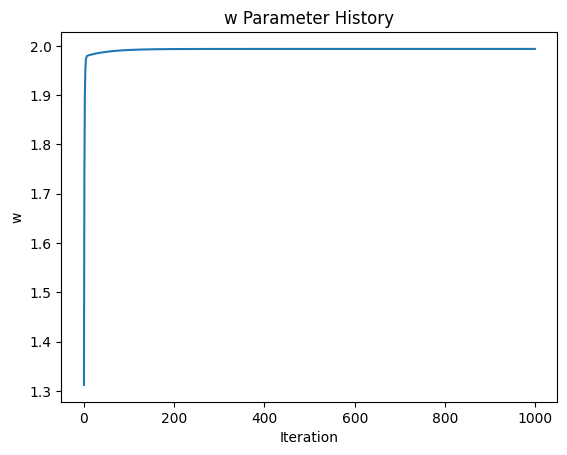

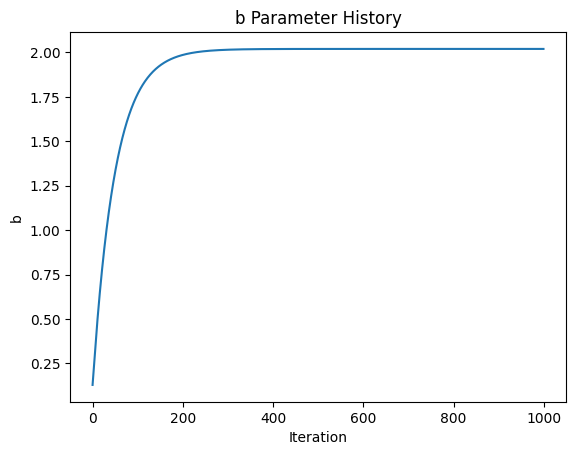

In [38]:
# parameter history
w_history = [p[0] for p in p_hist]
b_history = [p[1] for p in p_hist]

# Cost vs iteration
plt.plot(J_hist)
plt.title('Cost Function History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

# Parameter w vs iteration
plt.plot(w_history)
plt.title('w Parameter History')
plt.xlabel('Iteration')
plt.ylabel('w Parameter')
plt.show()

# Parameter b vs iteration
plt.plot(b_history)
plt.title('b Parameter History')
plt.xlabel('Iteration')
plt.ylabel('b Parameter')
plt.show()